## Cell Anneal, spearate bulks
- example data used is healthy liver LCM and Hassan's liver single cells

In [1]:
import scanpy as sc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
pylab.ion()
import pandas as pd
from anndata import AnnData

from cellanneal import make_sc_ref, make_high_var_gene_lists
from cellanneal import deconvolve
from cellanneal import plot_pies_from_df, plot_mix_heatmap, plot_1D_lines, plot_repeats, plot_scatter
from cellanneal import repeat_annealing

In [2]:
# data paths
# if you want to run on Windows, you need to fix the beginning of all paths below ("X:" etc)
# export paths
sc_import_path = "/Users/lisa/X/lisabu/data_processed/liver_LCM/SC_healthy_liver_Hassan.h5ad"
bulk_import_path = "/Users/lisa/X/lisabu/data_processed/liver_LCM/LCM_healthy_liver_CV1_to_CV6_Hassan.csv"

In [3]:
# import single cell data
sc_data = sc.read(sc_import_path)

In [4]:
# import bulk data
bulk_df = pd.read_csv(bulk_import_path, index_col=0)

In [9]:
# prepare reference datafrom single cell data
sc_ref_df = make_sc_ref(sc_data, groupby='cluster')

# produce lists of genes on which to base deconvolution
gene_dict = make_high_var_gene_lists(
                sc_ref_df,
                bulk_df,
                n_top_genes=None,
                bulk_min_thr=1e-5,
                bulk_max_thr=0.01,
                remove_mito=False)

3980 highly variable genes identified


In [8]:
[len(x) for x in gene_dict.values()]

[1820, 1561, 1786, 1745, 1759, 1735]

In [6]:
# export sc ref df for scanpy-free use cases
# sc_ref_df.to_csv('/Users/lisa/X/lisabu/sim_anneal_deconvolution/cellanneal/examples/example_data/sc_ref_human_liver.csv', sep=',', header=True, index=True)

### B) CellAnneal - using individual functions, no spatial connection

In [6]:
all_mix_df = deconvolve(sc_ref_df=sc_ref_df,
                     bulk_df=bulk_df,
                     maxiter=10,
                     gene_dict=gene_dict,
                     no_local_search=True)

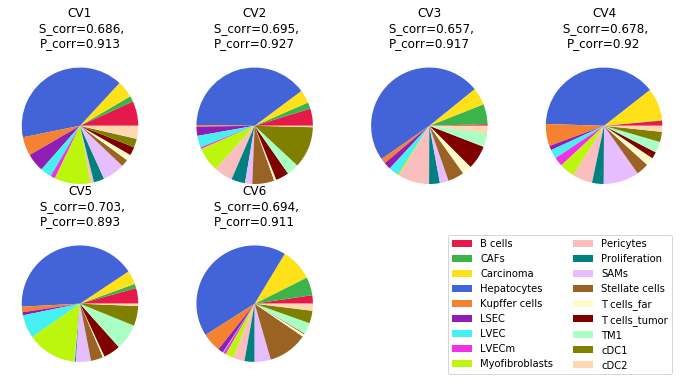

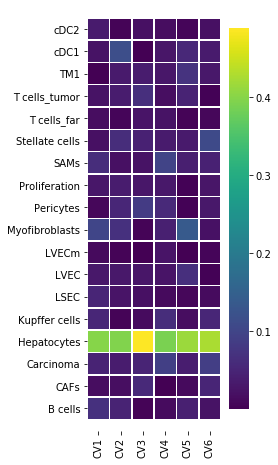

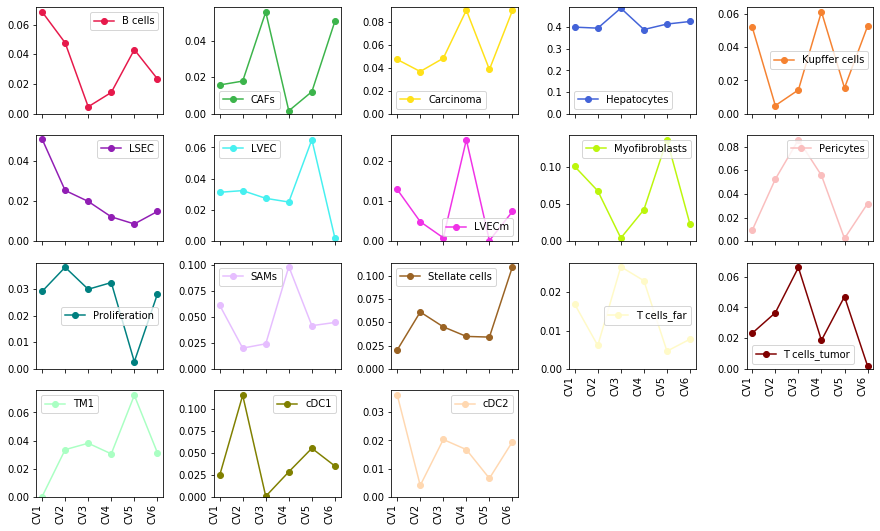

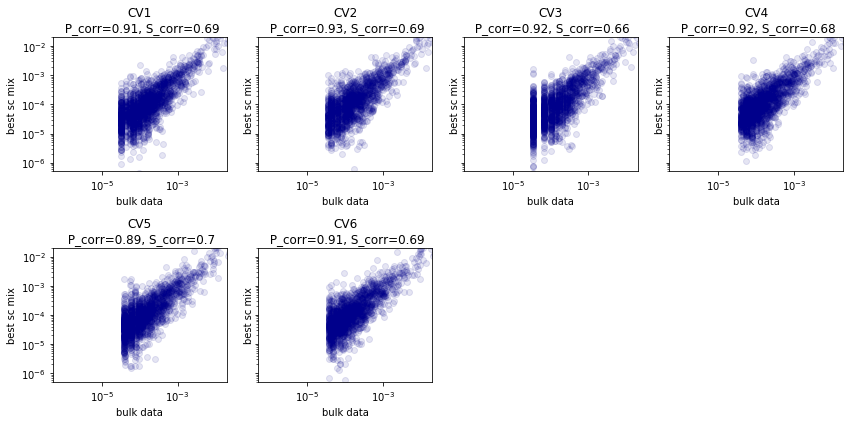

In [7]:
# plot results
plot_pies_from_df(all_mix_df)
plot_mix_heatmap(all_mix_df, rownorm=False)
plot_1D_lines(all_mix_df)
plot_scatter(all_mix_df, bulk_df, sc_ref_df, gene_dict)

In [11]:
t_repeat = repeat_annealing(sc_ref_df, bulk_df, gene_dict, no_local_search=True, n=10,
                                  maxiter=1000, save_path='results/repeat_separate_no_local_search_std_genes_maxiter1000.xlsx')

0
runtime: 206.0 s

1
runtime: 185.9 s

2
runtime: 167.6 s

3
runtime: 165.1 s

4
runtime: 168.0 s

5
runtime: 164.7 s

6
runtime: 160.9 s

7
runtime: 161.7 s

8
runtime: 161.6 s

9
runtime: 160.7 s



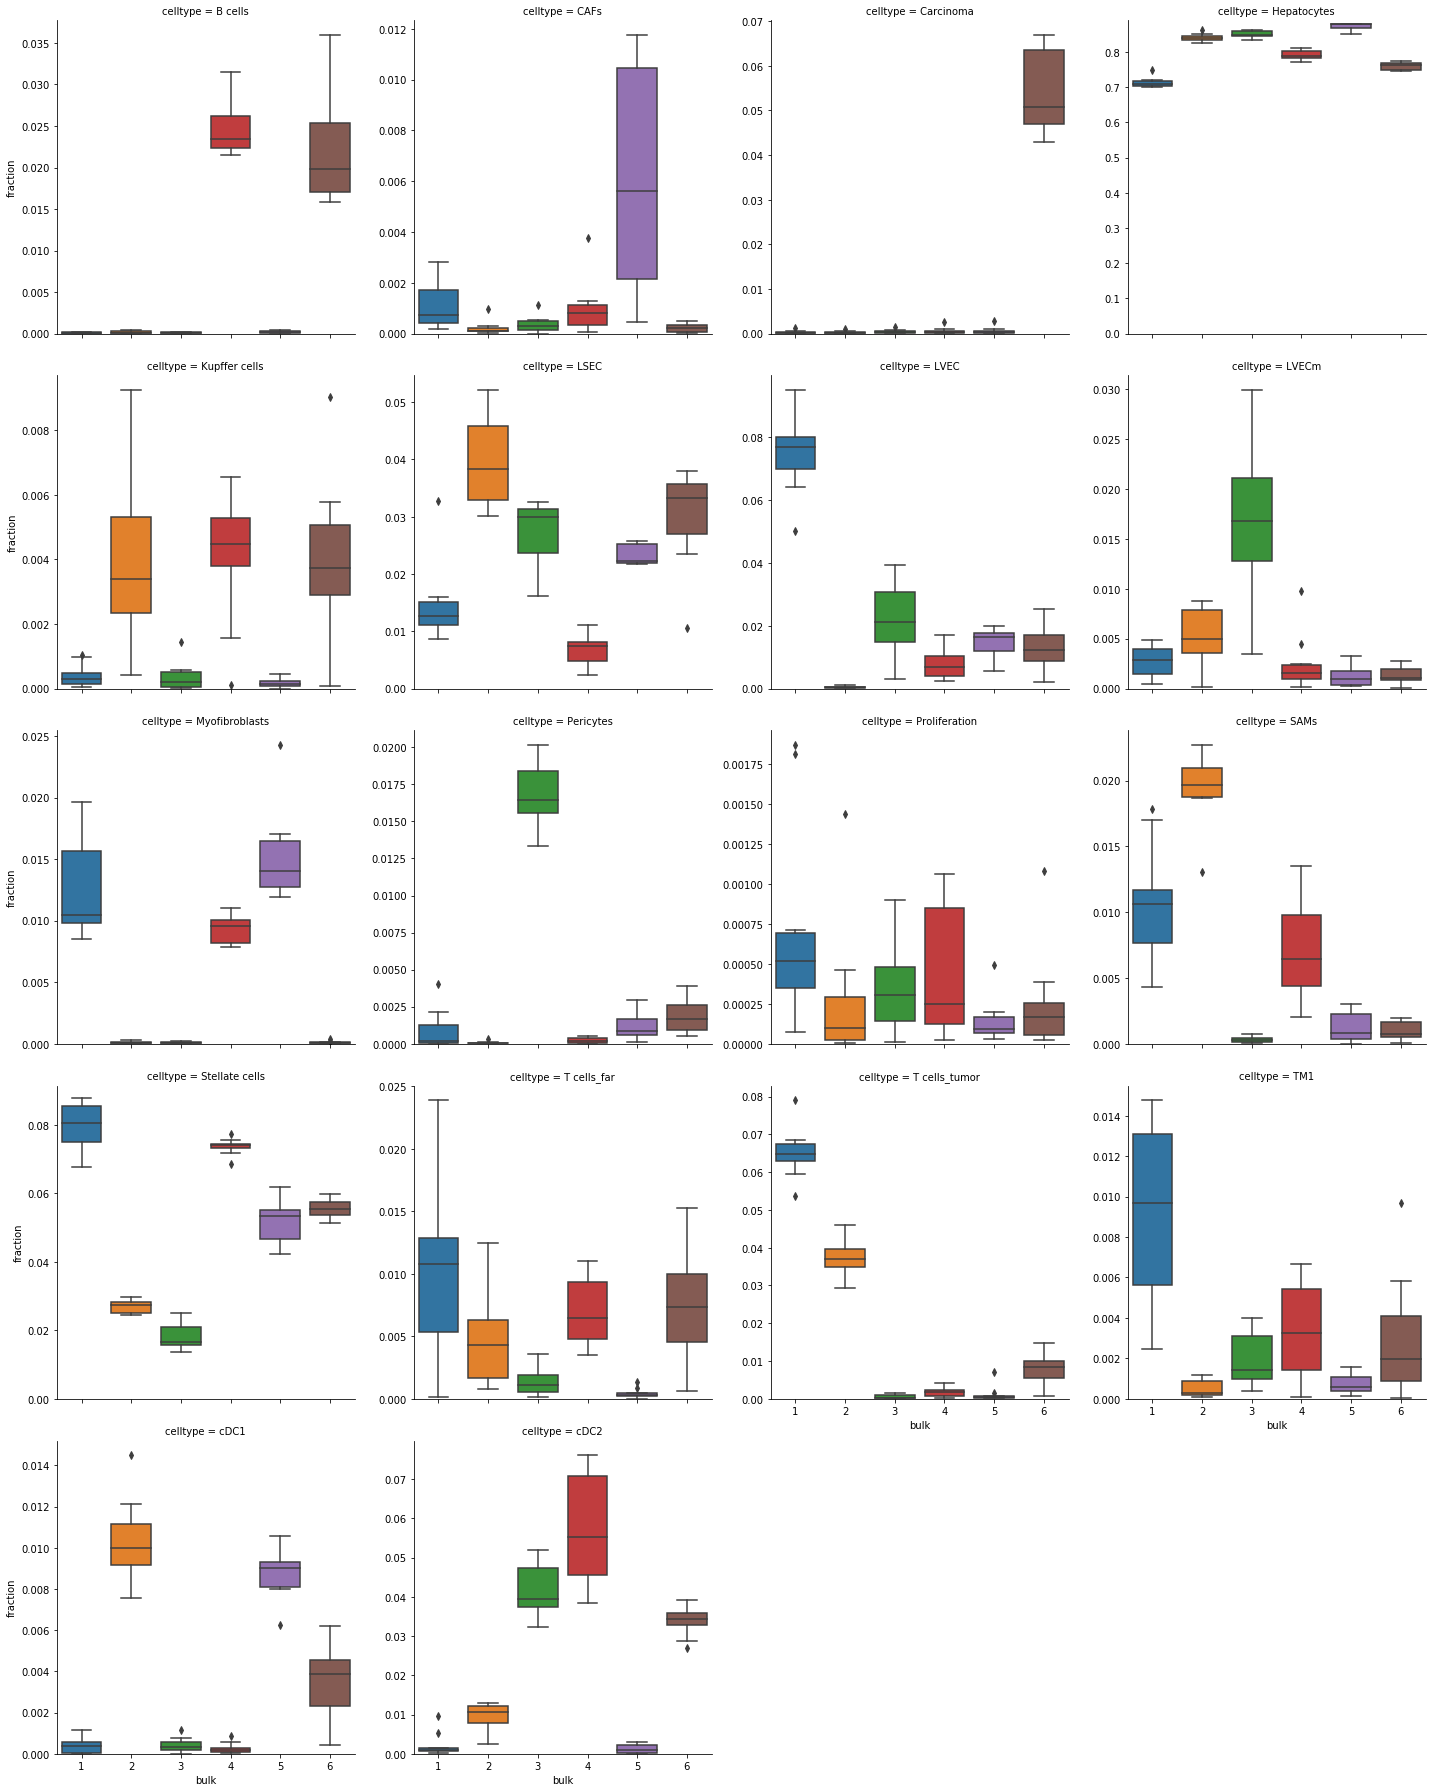

In [14]:
plot_repeats(t_repeat, kind='box', save_path='figures/box_repeat_separate_no_local_search_std_genes_maxiter1000.pdf')